In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Loading Dataset

In [90]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

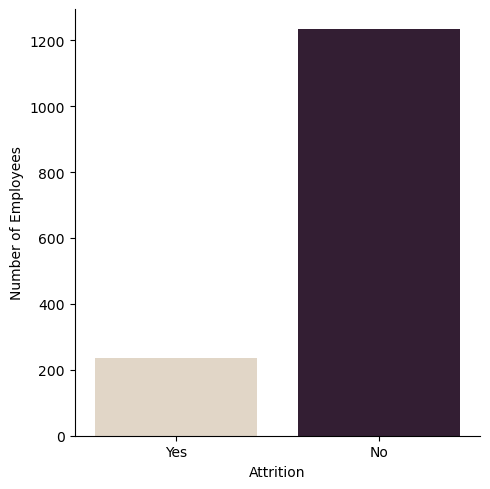

In [7]:
ax = sns.catplot(x='Attrition',kind='count',palette="ch:.25", data=data)
ax.set(xlabel = 'Attrition', ylabel = 'Number of Employees')
plt.show()

In [20]:
# Identify columns with missing values
missing_col = data.columns[data.isnull().any()].values
print('The missing columns in the dataset are: ',missing_col)

The missing columns in the dataset are:  []


In [36]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Step 2: Feature Engineering

In [38]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [72]:
# Mapping Attrition to 1 and 0
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

In [91]:
# Separating out numeric and categorical columns
df_num = pd.DataFrame(data=data.select_dtypes(include=['int64']))
df_cat = pd.DataFrame(data=data.select_dtypes(include=['object']))
print('Shape of Num Cols:',df_num.shape)
print('Shape of Cat Cols:',df_cat.shape)

Shape of Num Cols: (1470, 26)
Shape of Cat Cols: (1470, 9)


#### 2.1 Encoding Categorical Fields

In [74]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BusinessTravel  1470 non-null   object
 1   Department      1470 non-null   object
 2   EducationField  1470 non-null   object
 3   Gender          1470 non-null   object
 4   JobRole         1470 non-null   object
 5   MaritalStatus   1470 non-null   object
 6   Over18          1470 non-null   object
 7   OverTime        1470 non-null   object
dtypes: object(8)
memory usage: 92.0+ KB


In [47]:
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


#### 2.2 Scaling Numeric Fields

In [75]:
scaler = StandardScaler()
num_vars = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
df_num[num_vars] = scaler.fit_transform(df_num[num_vars])

In [76]:
df_num.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935


In [77]:
#Combining the Categorical and Numeric features
df_final = pd.concat([df_num,df_cat_encoded],axis=1)
print("Shape of final dataframe: ",df_final.shape)
df_final.head(3)

Shape of final dataframe:  (1470, 56)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.446350,1,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,...,0,0,1,0,0,0,1,1,0,1
1,1.322365,0,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,...,0,1,0,0,0,1,0,1,1,0
2,0.008343,1,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,...,0,0,0,0,0,0,1,1,0,1


In [78]:
y = df_final.pop('Attrition')
X = df_final

In [81]:
print(y.shape)
print(X.shape)

(1470,)
(1470, 55)


#### 2.3 Train and Test Split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state = 0, stratify = y)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (1102, 55)
Shape of X_test:  (368, 55)
Shape of y_train:  (1102,)
Shape of y_test:  (368,)


### Step 3 - Model Fitting
- The most important parameters are base_estimator, n_estimators and learning_rate.
- 1. base_estimator - It is the learning algorithm to use to train the weak models. The default Learning Algorithm is - -DecisionTreeClassifier with Max Depth of 1
- 2. n_estimators - It is the number of models to iteratively train.
- 3.learning_rate - It is the contribution of each model to the weights and default value for it is 1. There is a trade-off between learning_rate and n_estimators. Reducing the learning rate will forcing the model train slower (but sometimes resulting in better performance scores). Decreasing the learning rate L makes the coefficients α_m smaller, which reduces the amplitude of the sample_weights at each step (As per weight formula we use at each step for updating weights).

In [83]:
# Using Adaboost Classifier
adaboost = AdaBoostClassifier(n_estimators=200,random_state=42)

In [84]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [85]:
y_test_pred = adaboost.predict(X_test)

In [86]:
print("Accuracy Score:",accuracy_score(y_test,y_test_pred))

Accuracy Score: 0.8777173913043478


In [87]:
cm = confusion_matrix(y_test,y_test_pred)
print('The Confussion Matrix:\n',cm)

The Confussion Matrix:
 [[296  13]
 [ 32  27]]


In [89]:
df_num.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935


In [92]:
scaler = StandardScaler()

In [93]:
df_num_scaled = scaler.fit_transform(df_num)

In [98]:
df_num_scaled = pd.DataFrame(data=df_num_scaled,columns=df_num.columns,index=df_num.index)

In [99]:
type(df_num_scaled)

pandas.core.frame.DataFrame

In [100]:
df_num_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
